# Create NDDataset objects

In [1]:
from spectrochempy.api import *


        SpectroChemPy's API
        Version   : 0.1a3.dev
        Copyright : 2014-2017 - LCS (Laboratory for Catalysis and Spectrochempy)
            


Multidimensional array are defined in Spectrochempy using the ``NDDataset`` object.

``NDDataset`` objects mostly behave as numpy's `numpy.ndarray`.

However, unlike raw numpy's ndarray, the presence of optional properties such
as `uncertainty`, `mask`, `units`, `axes`, and axes `labels` make them
(hopefully) more appropriate for handling spectroscopic information, one of
the major objectives of the SpectroChemPy package.

Additional metadata can also be added to the instances of this class through the
`meta` properties.

## Create a ND-Dataset from scratch

In the following example, a minimal 1D dataset is created from a simple list, to which we can add some metadata:

In [2]:
da = NDDataset([1,2,3])
da.title = 'intensity'   
da.history = 'created from scratch'
da.description = 'Some experimental measurements'
da.units = 'dimensionless'
print(da)

      name/id: 3b4b1924
       author: christian@MacBook-Pro-de-Christian.local
      created: 2017-11-26 10:50:27.502259
last modified: 2017-11-26 10:50:27.516510
  description: Some experimental measurements
      history: created from scratch
   data title: intensity
    data size: 3
  data values:
         [       1        2        3] dimensionless




to get a rich display of the dataset, simply type on the last line of the cell.

In [3]:
da

NDDataset: [       1,        2,        3] dimensionless

Except few addtional metadata such `author`, `created` ..., there is not much
differences with respect to a conventional `numpy.ndarray`. For example, one
can apply numpy ufunc's directly to a NDDataset or make basic arithmetic
operation with these objects:

In [4]:
da2 = np.sqrt(da**3)
da2

NDDataset: [   1.000,    2.828,    5.196] dimensionless

In [5]:
da3 = da + da/2.
da3

NDDataset: [   1.500,    3.000,    4.500] dimensionless

## Create a NDDataset : full example

There are many ways to create |NDDataset| objects.

Above we have created a NDDataset from a simple list, but it is generally more
convenient to create `numpy.ndarray`).

Below is an example of a 3D-Dataset created from a ``numpy.ndarray`` to which axes can be added. 

Let's first create the 3 one-dimensional coordinates, for which we can define labels, units, and masks! 

In [6]:
coord0 = Coord(data = np.linspace(200., 300., 3),
            labels = ['cold', 'normal', 'hot'],
            mask = None,
            units = "K",
            title = 'temperature')

coord1 = Coord(data = np.linspace(0., 60., 100),
            labels = None,
            mask = None,
            units = "minutes",
            title = 'time-on-stream')

coord2 = Coord(data = np.linspace(4000., 1000., 100),
            labels = None,
            mask = None,
            units = "cm^-1",
            title = 'wavenumber')

Here is the displayed info for coord1 for instance:

In [7]:
coord1

Title,Time-on-stream
Data,"[ 0.000 0.606 ..., 59.394 60.000] min<br/"


Now we create some 3D data (a ``numpy.ndarray``):

In [8]:
nd_data=np.array([np.array([np.sin(coord2.data*2.*np.pi/4000.)*np.exp(-y/60.) for y in coord1.data])*float(t) 
         for t in coord0.data])**2

The dataset is now created with these data and axis. All needed information are passed as parameter of the 
NDDataset instance constructor. 

In [9]:
mydataset = NDDataset(nd_data,
               coordset = [coord0, coord1, coord2],
               title='Absorbance',
               units='absorbance'
              )

mydataset.description = """Dataset example created for this tutorial. 
It's a 3-D dataset (with dimensionless intensity)"""

mydataset.author = 'Blake & Mortimer'

We can get some information about this object:

In [10]:
print(mydataset)
mydataset

      name/id: 3b61b828
       author: Blake & Mortimer
      created: 2017-11-26 10:50:27.650474
last modified: 2017-11-26 10:50:27.654081
  description: Dataset example created for this tutorial.
               It's a 3-D dataset (with dimensionless intensity)
      history: 
   data title: Absorbance
   data shape: 3 x 100 x 100
  data values:
         [[[   0.000   90.562 ..., 39909.438 40000.000]
           [   0.000   88.750 ..., 39111.277 39200.027]
           ..., 
           [   0.000   12.506 ..., 5511.379 5523.885]
           [   0.000   12.256 ..., 5401.155 5413.411]]

          [[   0.000  141.502 ..., 62358.498 62500.000]
           [   0.000  138.672 ..., 61111.370 61250.042]
           ..., 
           [   0.000   19.541 ..., 8611.530 8631.071]
           [   0.000   19.150 ..., 8439.305 8458.455]]

          [[   0.000  203.763 ..., 89796.237 90000.000]
           [   0.000  199.688 ..., 88000.372 88200.061]
           ..., 
           [   0.000   28.139 ..., 12400.603

NDDataset: [[[   0.000,   90.562, ..., 39909.438, 40000.000],
             [   0.000,   88.750, ..., 39111.277, 39200.027],
             ..., 
             [   0.000,   12.506, ..., 5511.379, 5523.885],
             [   0.000,   12.256, ..., 5401.155, 5413.411]],

            [[   0.000,  141.502, ..., 62358.498, 62500.000],
             [   0.000,  138.672, ..., 61111.370, 61250.042],
             ..., 
             [   0.000,   19.541, ..., 8611.530, 8631.071],
             [   0.000,   19.150, ..., 8439.305, 8458.455]],

            [[   0.000,  203.763, ..., 89796.237, 90000.000],
             [   0.000,  199.688, ..., 88000.372, 88200.061],
             ..., 
             [   0.000,   28.139, ..., 12400.603, 12428.742],
             [   0.000,   27.576, ..., 12152.599, 12180.175]]] a.u.

## Copying existing NDDataset

To copy an existing dataset, this is as simple as:

In [11]:
da_copy = da.copy()

or alternatively:

In [12]:
da_copy = da[:]

Finally, it is also possible to initialize a dataset using an existing one:

In [13]:
dc = NDDataset(da3, name='duplicate', units='absorbance')
dc

NDDataset: [   1.500,    3.000,    4.500] a.u.

### See also

Any numpy creation function can be used to set up the initial dataset array:
       [numpy array creation routines](https://docs.scipy.org/doc/numpy/reference/routines.array-creation.html#routines-array-creation)



## Importing from external dataset

NDDataset can be created from the importation of external data

(The builtin **scpdata** variable contains a path to our *test*'s data)

In [14]:
# let check if this directory exists and display its actual content:
import os
if os.path.exists(scpdata):
    l = list_scpdata
print(list_scpdata)

testdata
|__agirdata
   |__A350
      |__FTIR
         |__FTIR.scp
         |__FTIR.zip
         |__FTIR_corrected.scp
      |__TGA
         |__tg.csv
         |__tg.scp
   |__agir_setup.png
   |__B350
      |__FTIR
         |__FTIR.scp
         |__FTIR.zip
         |__FTIR_corrected.scp
      |__TGA
         |__tg.csv
         |__tg.scp
   |__conversion.csv
   |__P350
      |__FTIR
         |__FTIR.scp
         |__FTIR.zip
         |__FTIR_corrected.scp
      |__TGA
         |__tg.csv
         |__tg.scp
|__irdata
   |__nh4.scp
   |__nh4y-activation.spg
|__mydataset.scp
|__nmrdata
   |__bruker
      |__tests
         |__nmr
            |__bruker_1d
               |__1
                  |__pdata
                     |__1
                        |__proc
                        |__procs
                        |__title
            |__bruker_2d
               |__1
                  |__audita.txt
                  |__pdata
                     |__1
                        |__auditp.txt
    

###  Reading a IR dataset saved by OMNIC (.spg extension)

In [15]:
source = NDDataset.read_omnic(os.path.join(scpdata, 'irdata', 'NH4Y-activation.SPG'))
source

NDDataset: [[   2.057,    2.061, ...,    2.013,    2.012],
            [   2.033,    2.037, ...,    1.913,    1.911],
            ..., 
            [   1.794,    1.791, ...,    1.198,    1.198],
            [   1.816,    1.815, ...,    1.240,    1.238]] a.u.

## Slicing a NDDataset

NDDataset can be sliced like conventional numpy-array...

*e.g.,*:

1. by index, using a slice such as [3], [0:10], [:, 3:4], [..., 5:10], ...

2. by values, using a slice such as [3000.0:3500.0], [..., 300.0], ...

3. by labels, using a slice such as ['monday':'friday'], ...

In [16]:
new = mydataset[..., 0]
new

NDDataset: [[   0.000,    0.000, ...,    0.000,    0.000],
            [   0.000,    0.000, ...,    0.000,    0.000],
            [   0.000,    0.000, ...,    0.000,    0.000]] a.u.

or using the axes labels:

In [17]:
new = mydataset['hot']
new

NDDataset: [[   0.000,  203.763, ..., 89796.237, 90000.000],
            [   0.000,  199.688, ..., 88000.372, 88200.061],
            ..., 
            [   0.000,   28.139, ..., 12400.603, 12428.742],
            [   0.000,   27.576, ..., 12152.599, 12180.175]] a.u.

Be sure to use the correct type for slicing.

Floats are use for slicing by values

In [18]:
correct = mydataset[...,2000.]

In [19]:
outside_limits = mydataset[...,10000.]

 WARNING | SpectroChemPyWarning:  This coordinate (10000.0) is outside the axis limits (1000.0-4000.0).
The closest limit index is returned


<div class='alert alert-info'>**NOTE:**

If one use an integer value (2000), then the slicing is made **by index not by value**, and in the following particular case, an `IndexError` is issued as index 2000 does not exists (size along axis -1 is only 100, so that index vary between 0 and 99!).

</div>

When slicing by index, an error is generated is the index is out of limits:

In [20]:
try:
    fail = mydataset[...,2000]
except IndexError as e:
    log.error(e)

 ERROR | Empty array of shape (3, 100, 0)resulted from slicing.
Check the indexes and make sure to use floats for location slicing


One can mixed slicing methods for different dimension:

In [21]:
new = mydataset['normal':'hot', 0, 4000.0:2000.]
new

NDDataset: [[   0.000,  141.502, ...,  141.502,    0.000],
            [   0.000,  203.763, ...,  203.763,    0.000]] a.u.

## Loading of experimental data


### NMR Data

Now, lets load a NMR dataset (in the Bruker format).

In [22]:
path = os.path.join(scpdata, 'nmrdata','bruker', 'tests', 'nmr','bruker_1d')

# load the data in a new dataset
ndd = NDDataset()
ndd.read_bruker_nmr(path, expno=1, remove_digital_filter=True)
ndd

NDDataset: [-1037.267, -1077.841, ...,   -0.053,    0.101] unitless

<IPython.core.display.Javascript object>


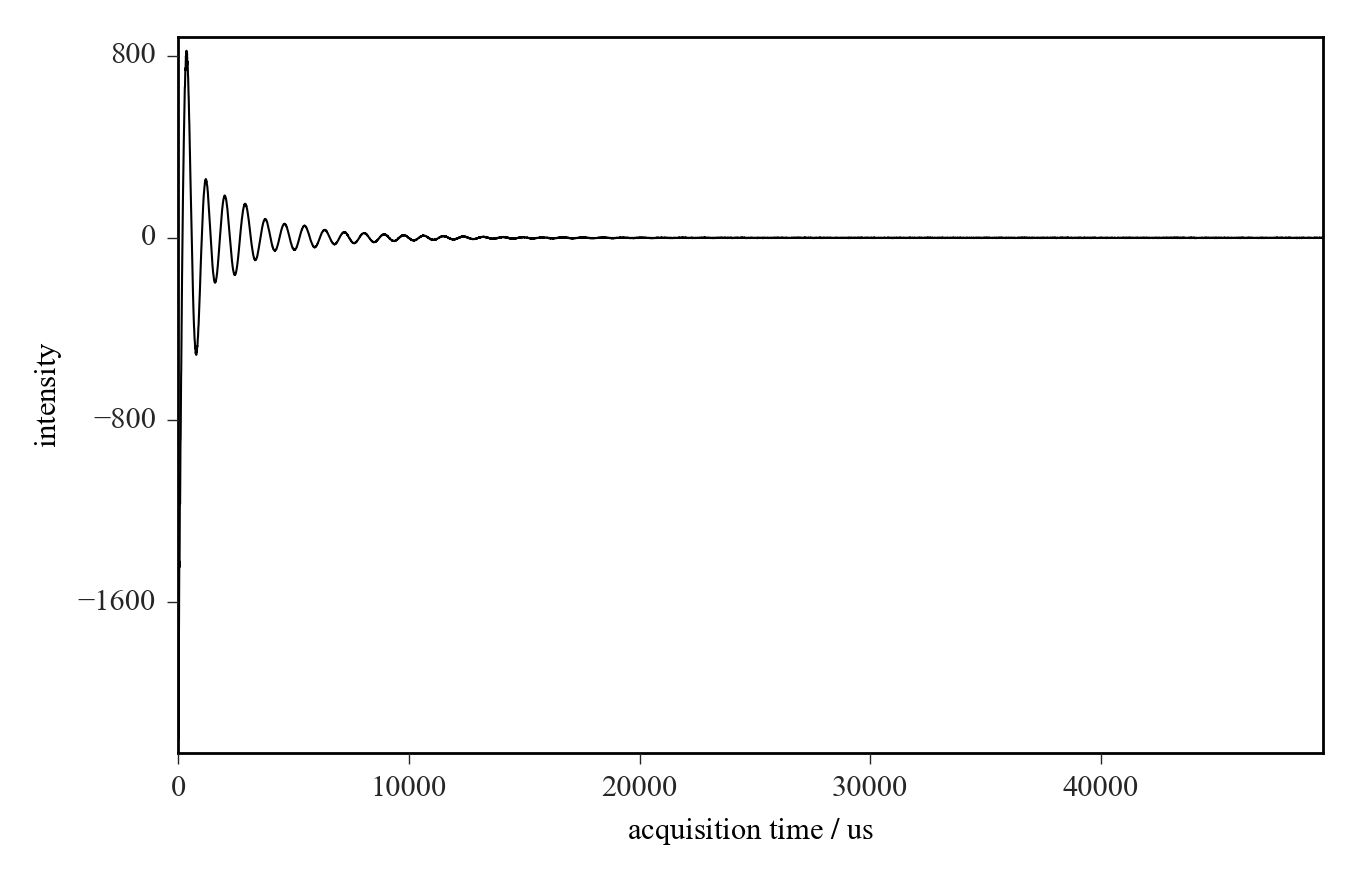

In [23]:
# view it...
ndd.plot()
show()  # in notebooks this is not required, as figure are showed automatically

<IPython.core.display.Javascript object>


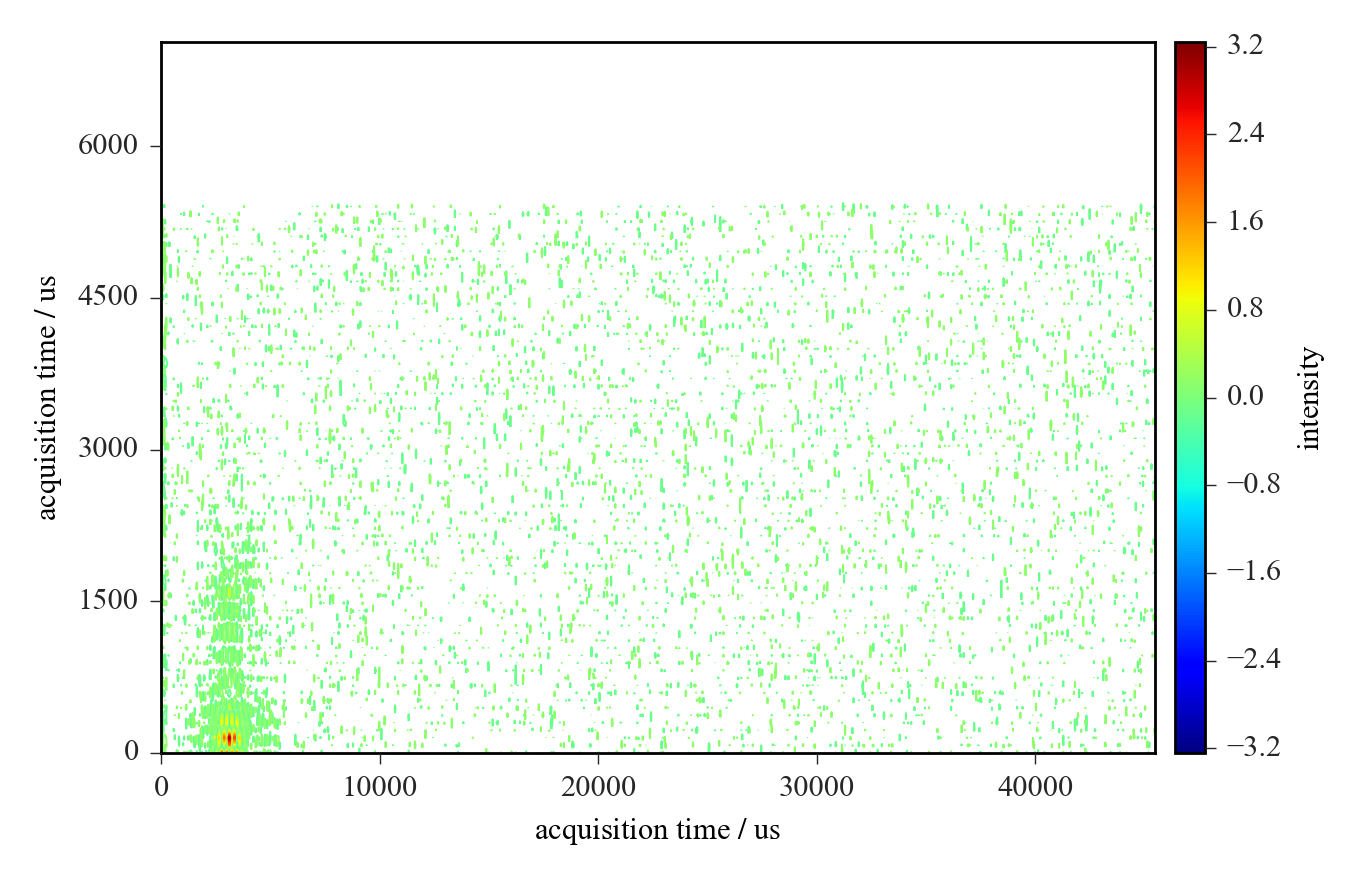

In [24]:
path = os.path.join(scpdata, 'nmrdata','bruker', 'tests', 'nmr','bruker_2d')

# load the data directly (no need to create the dataset first)
ndd2 = NDDataset.read_bruker_nmr(path, expno=1, remove_digital_filter=True)

# view it...
ndd2.x.to('s')
ndd2.y.to('ms')

fig2 = ndd2.plot() 

### IR data

In [25]:
source = NDDataset.read_omnic(os.path.join(scpdata, 'irdata', 'NH4Y-activation.SPG'))
source

NDDataset: [[   2.057,    2.061, ...,    2.013,    2.012],
            [   2.033,    2.037, ...,    1.913,    1.911],
            ..., 
            [   1.794,    1.791, ...,    1.198,    1.198],
            [   1.816,    1.815, ...,    1.240,    1.238]] a.u.

In [26]:
source = read_omnic(NDDataset(), os.path.join(scpdata, 'irdata', 'NH4Y-activation.SPG'))

<IPython.core.display.Javascript object>


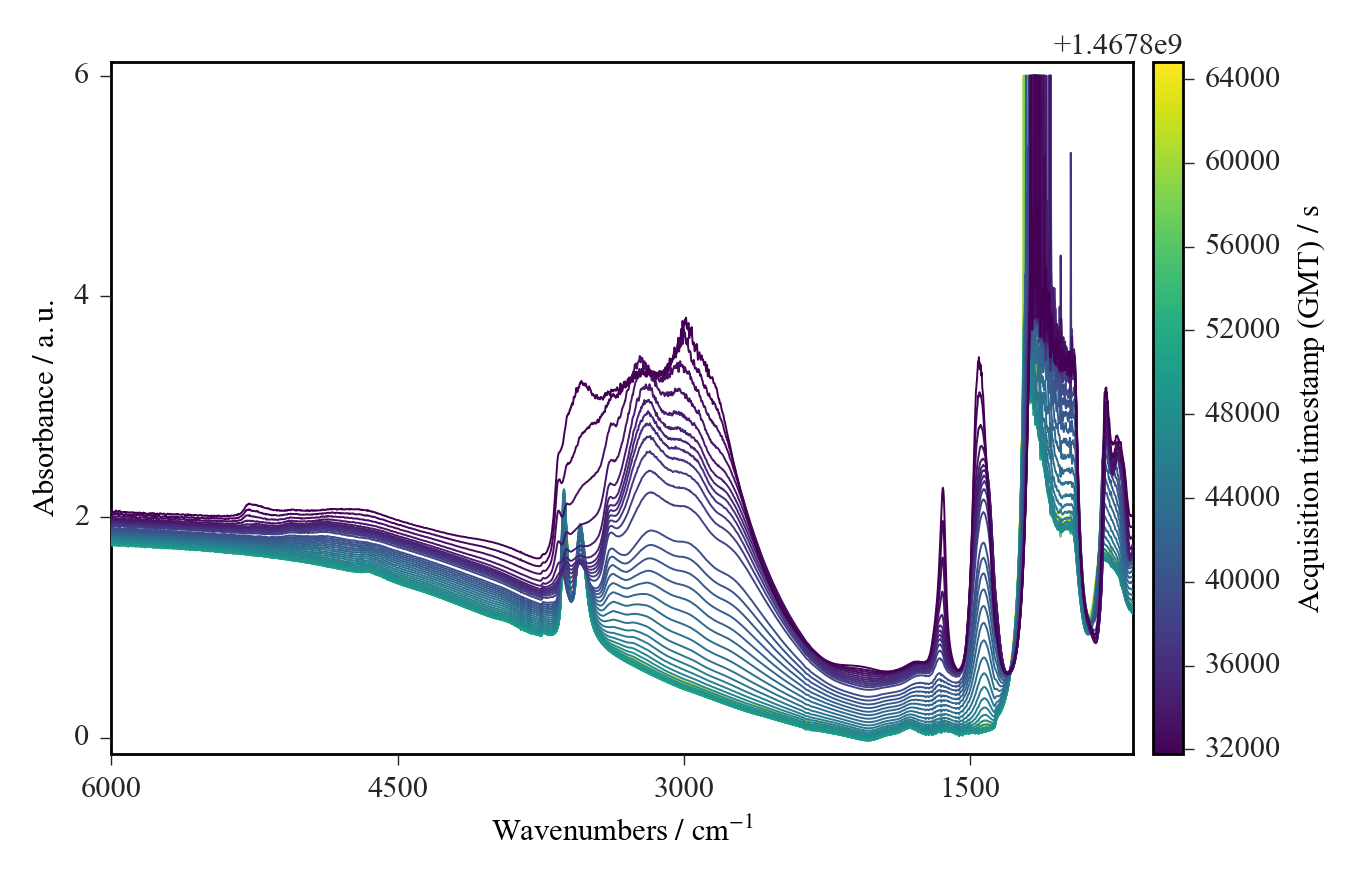

In [27]:
fig = source.plot(kind='stack')

## Masks

Masking values in a dataset is straigthforward. Just set a value `masked` or True for those data you want to mask.

<IPython.core.display.Javascript object>


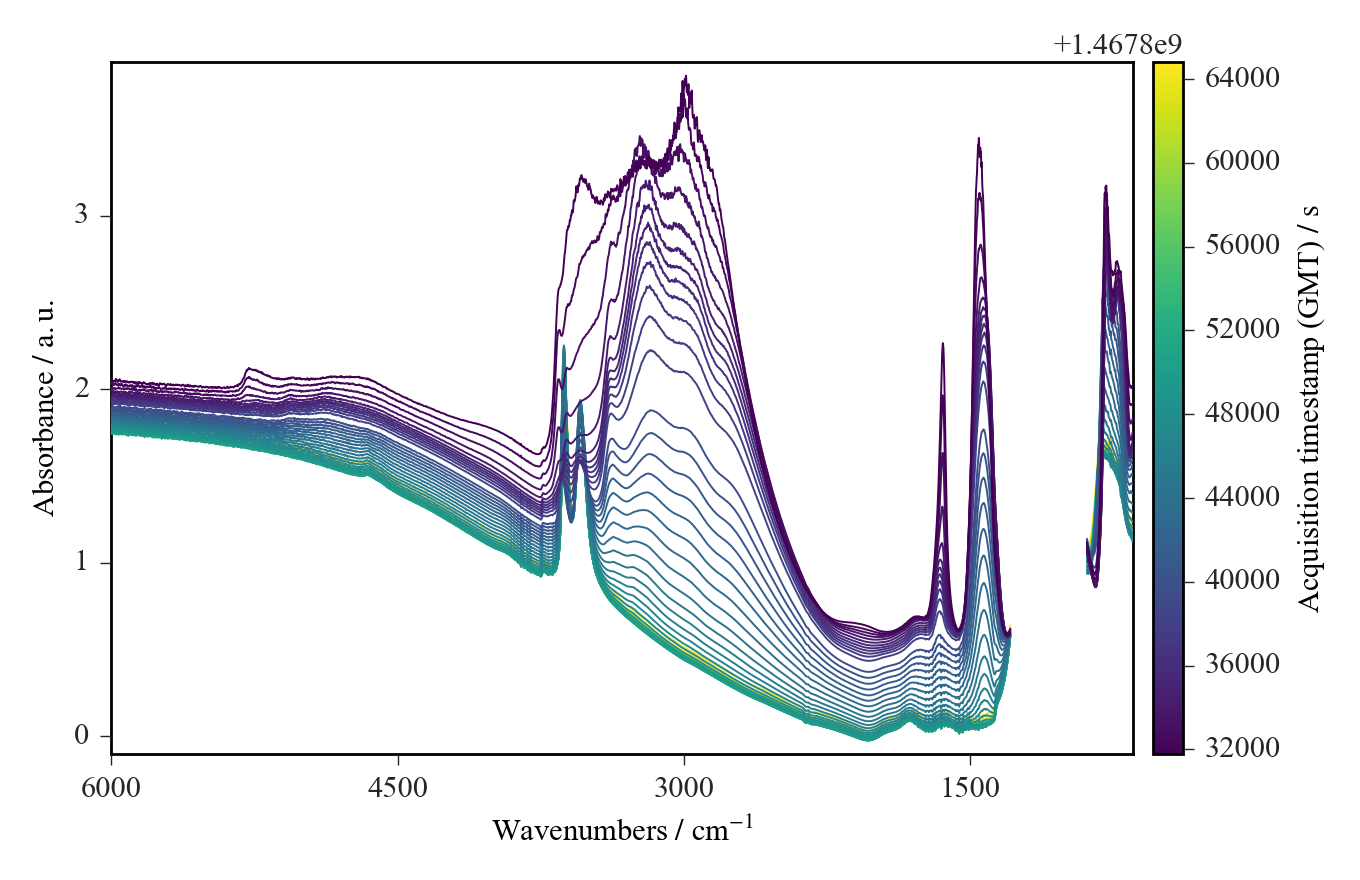

In [28]:
source[:,1290.:890.] = masked
source.plot_stack()

Masks can also be set interactively

<IPython.core.display.Javascript object>


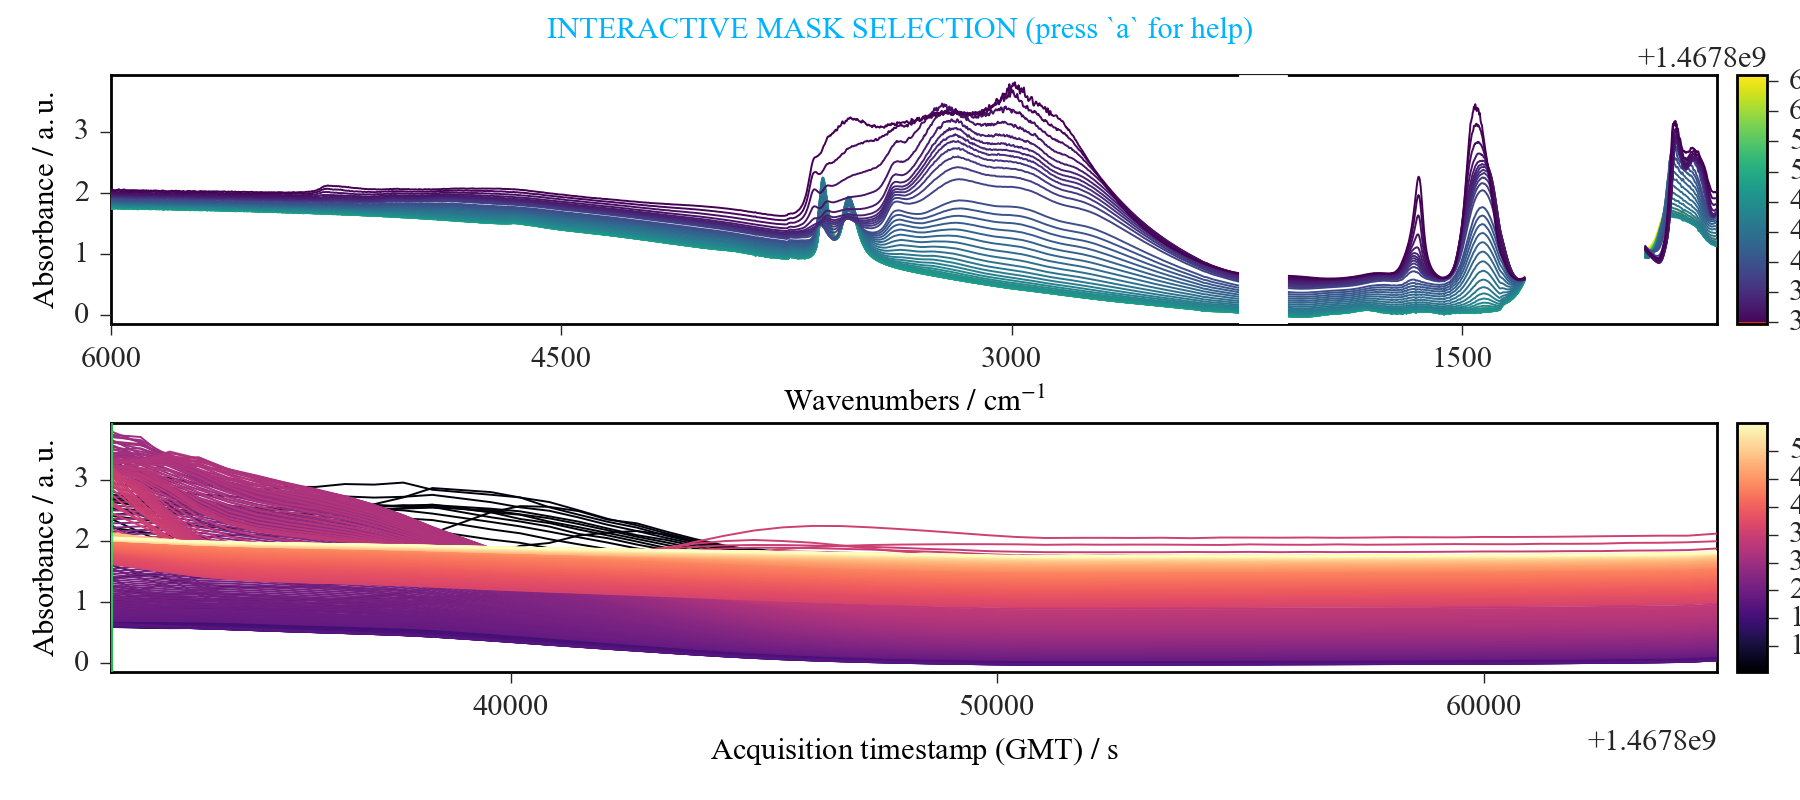

In [29]:
source.interactive_masks(figsize=(9, 4))

Here is a display the figure with the new mask

<IPython.core.display.Javascript object>


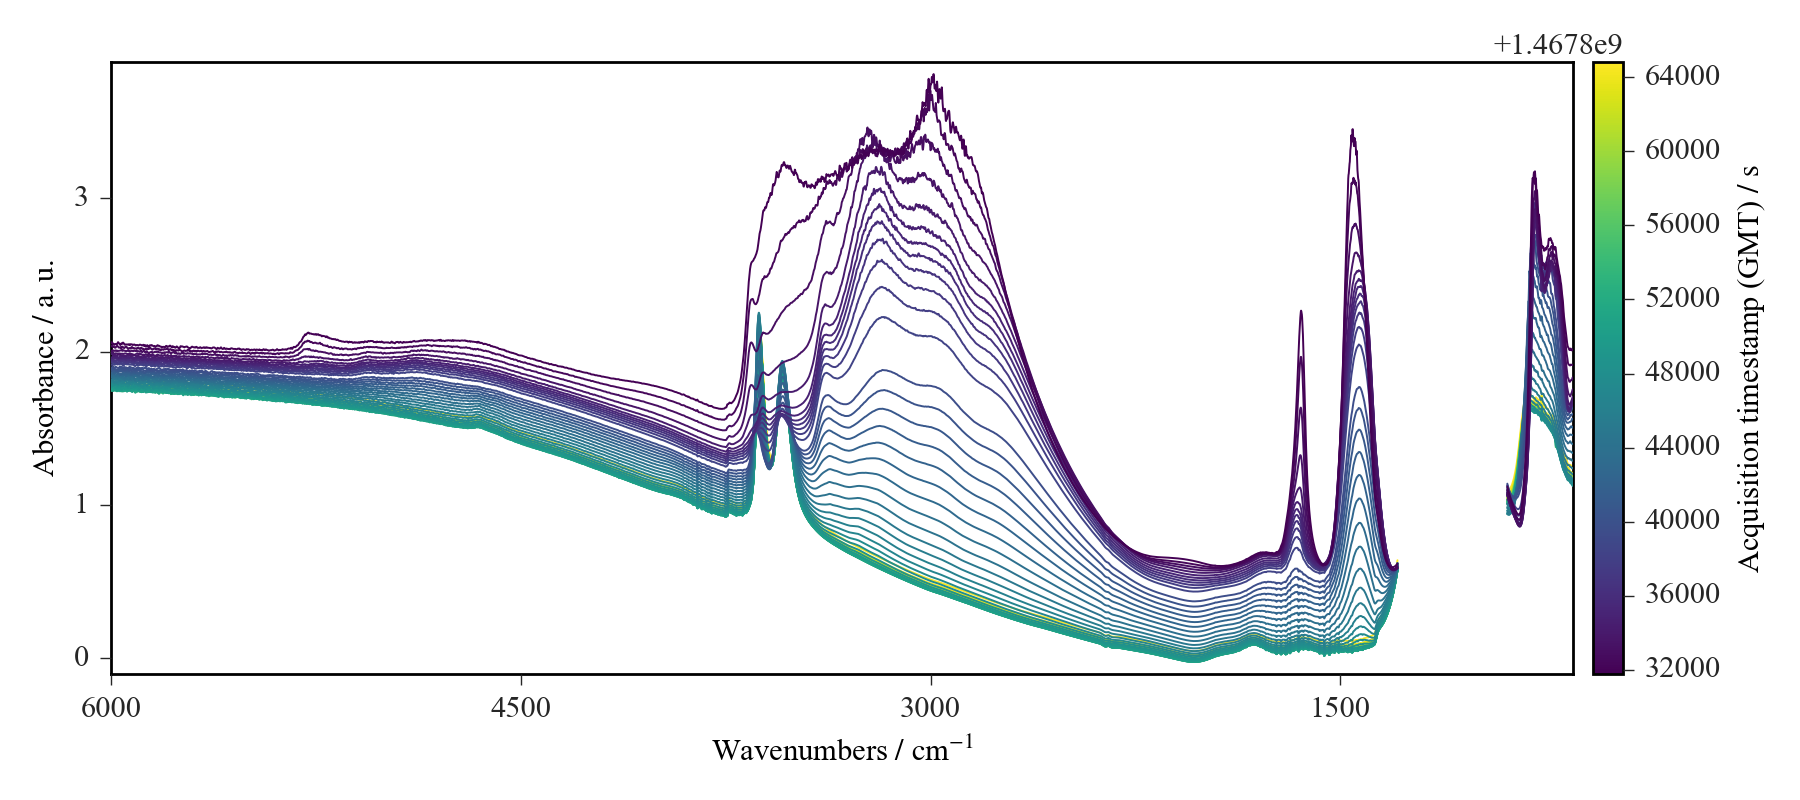

In [30]:
source.plot_stack(figsize=(9, 4))

## Transposition

Dataset can be transposed

In [31]:
sourceT = source.T
sourceT

NDDataset: [[   2.057,    2.033, ...,    1.794,    1.816],
            [   2.061,    2.037, ...,    1.791,    1.815],
            ..., 
            [   2.013,    1.913, ...,    1.198,    1.240],
            [   2.012,    1.911, ...,    1.198,    1.238]] a.u.

<IPython.core.display.Javascript object>


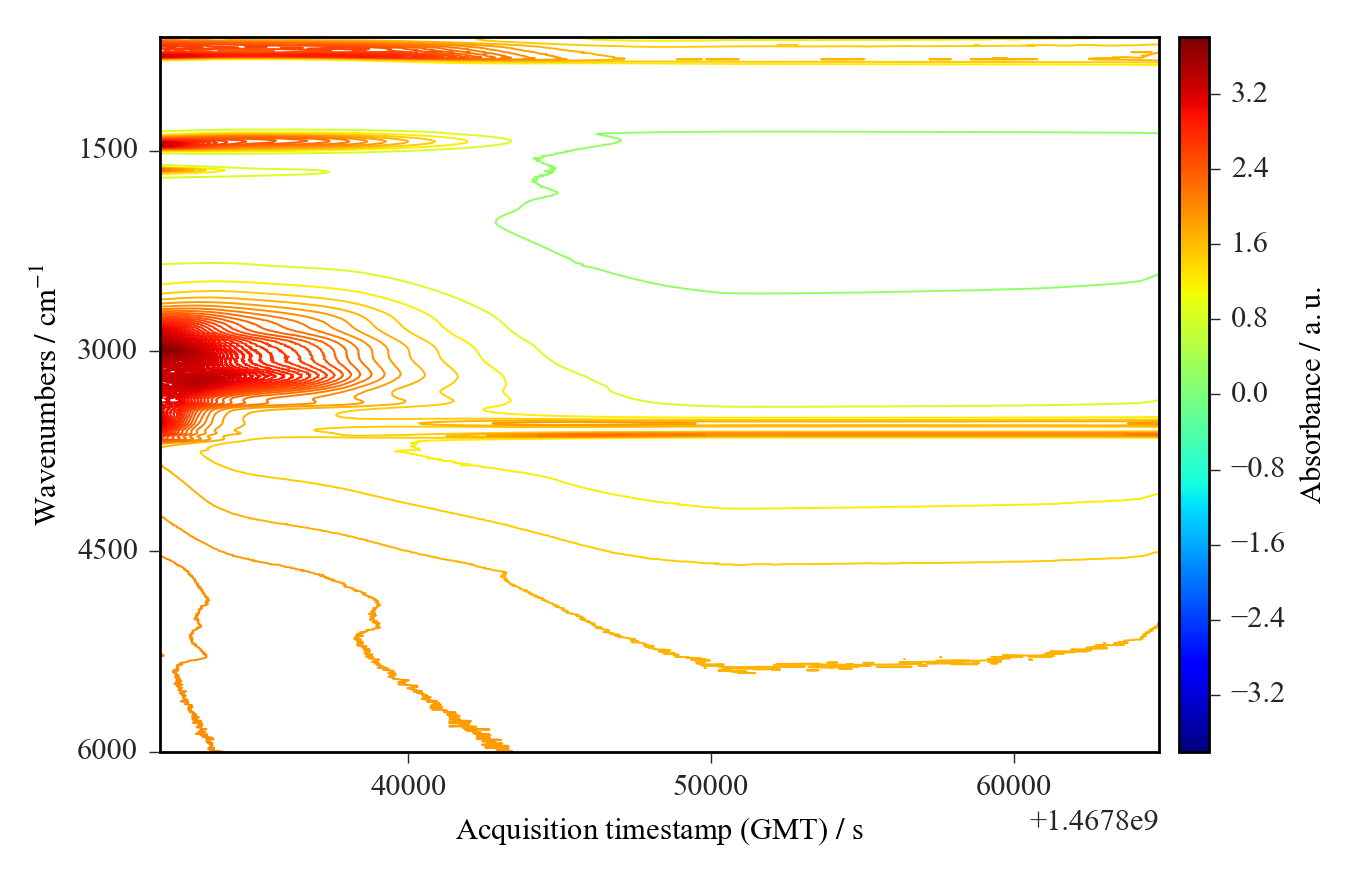

In [32]:
sourceT.plot()

<IPython.core.display.Javascript object>


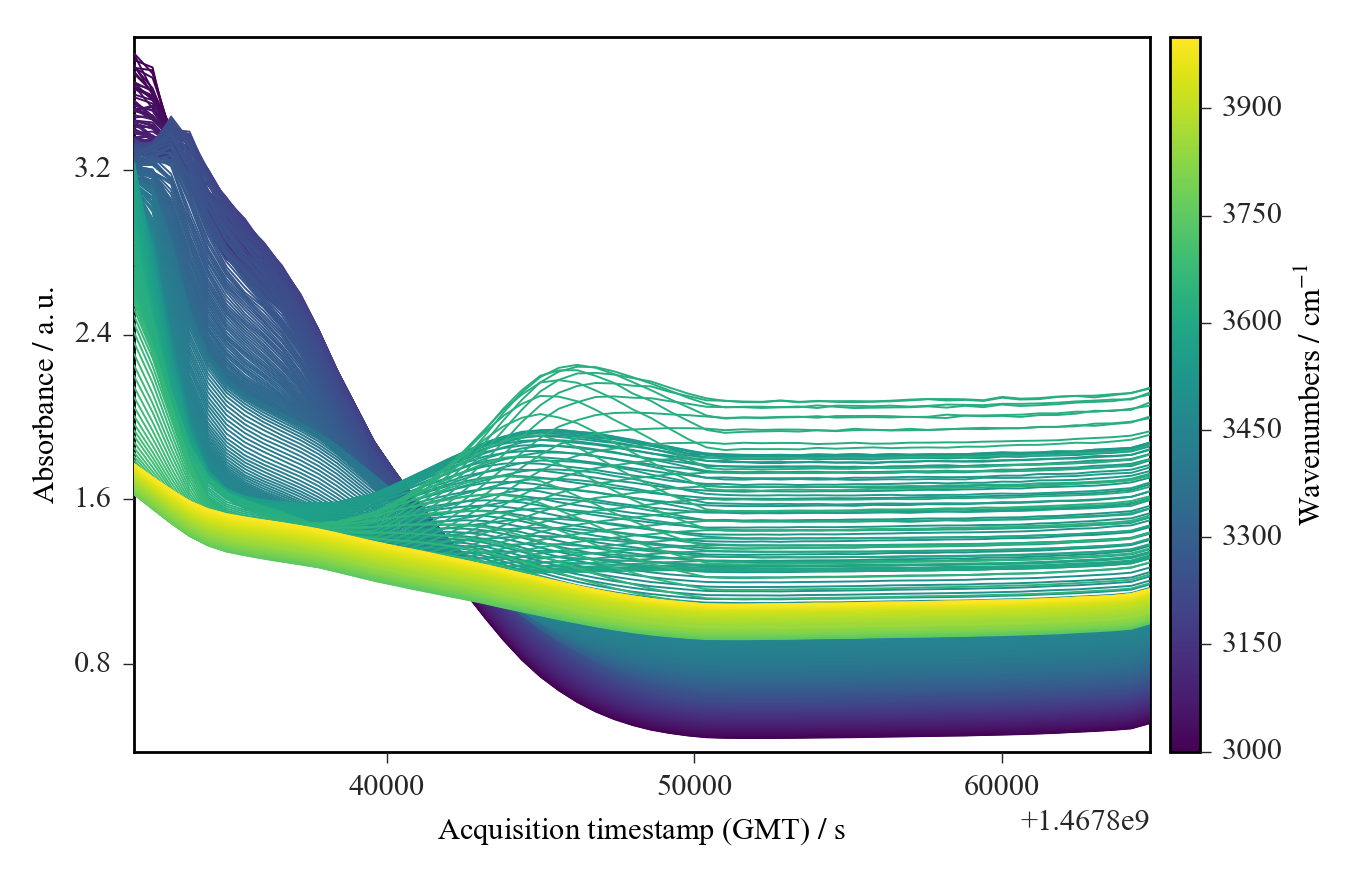

In [33]:
source.T[4000.:3000.].plot_stack()

## Units


Spectrochempy can do calculations with units - it uses [pint](https://pint.readthedocs.io) to define and perform operation on data with units.

### Create quantities

* to create quantity, use for instance, one of the following expression:

In [34]:
Quantity('10.0 cm^-1')

<Quantity(10.0, '1 / centimeter')>

In [35]:
Quantity(1.0, 'cm^-1/hour')

<Quantity(1.0, '1 / centimeter / hour')>

In [36]:
Quantity(10.0, ur.cm/ur.km)

<Quantity(10.0, 'centimeter / kilometer')>

or may be (?) simpler,

In [37]:
10.0 * ur.meter/ur.gram/ur.volt

<Quantity(10.0, 'meter / gram / volt')>

`ur` stands for **unit registry**, which handle many type of units
(and conversion between them)

### Do arithmetics with units

In [38]:
a = 900 * ur.km
b = 4.5 * ur.hours
a/b

<Quantity(200.0, 'kilometer / hour')>

Such calculations can also be done using the following syntax, using a string expression

In [39]:
Quantity("900 km / (8 hours)")

<Quantity(112.5, 'kilometer / hour')>

### Convert between units

In [40]:
c = a/b
c.to('cm/s')

<Quantity(5555.555555555556, 'centimeter / second')>

We can make the conversion *inplace* using *ito* instead of *to*

In [41]:
c.ito('m/s')
c

<Quantity(55.55555555555556, 'meter / second')>

### Do math operations with consistent units

In [42]:
x = 10 * ur.radians
np.sin(x)

<Quantity(-0.5440211108893699, 'dimensionless')>

Consistency of the units are checked!

In [43]:
x = 10 * ur.meters
np.sqrt(x)

<Quantity(3.1622776601683795, 'meter ** 0.5')>

but this is wrong...

In [44]:
x = 10 * ur.meters
try:
    np.cos(x)
except DimensionalityError as e:
    log.error(e)

 ERROR | Cannot convert from 'meter' to 'radian'


Units can be set for NDDataset data and/or Coordinates

In [45]:
ds = NDDataset([1., 2., 3.], units='g/cm^3', title='concentration')
ds

NDDataset: [   1.000,    2.000,    3.000] g.cm^-3

In [46]:
ds.to('kg/m^3')

NDDataset: [1000.000, 2000.000, 3000.000] kg.m^-3

## Uncertainties

Spectrochempy can do calculations with uncertainties (and units).

A quantity, with an `uncertainty` is called a **Measurement** .

Use one of the following expression to create such `Measurement`:

In [47]:
Measurement(10.0, .2, 'cm') 

<Measurement(10.00, 0.20, centimeter)>

In [48]:
Quantity(10.0, 'cm').plus_minus(.2)   

<Measurement(10.00, 0.20, centimeter)>

## Numpy universal functions (ufunc's)

A numpy universal function (or `numpy.ufunc` for short) is a function that
operates on `numpy.ndarray` in an element-by-element fashion. It's
vectorized and so rather fast.

As SpectroChemPy NDDataset imitate the behaviour of numpy objects, many numpy
ufuncs can be applied directly.

For example, if you need all the elements of a NDDataset to be changed to the
squared rooted values, you can use the `numpy.sqrt` function:

In [49]:
da = NDDataset([1., 2., 3.])
da_sqrt = np.sqrt(da)
da_sqrt

NDDataset: [   1.000,    1.414,    1.732] unitless

### Ufuncs with NDDataset with units

When NDDataset have units, some restrictions apply on the use of ufuncs:

Some function functions accept only dimensionless quantities. This is the
case for example of logarithmic functions: :`exp` and `log`.

In [50]:
np.log10(da)

NDDataset: [   0.000,    0.301,    0.477] unitless

In [51]:
da.units = ur.cm

try:
    np.log10(da)
except DimensionalityError as e:
    log.error(e)

 ERROR | Cannot convert from 'centimeter' ([length]) to 'dimensionless' (dimensionless)


## Complex or hypercomplex NDDatasets


NDDataset objects with complex data are handled differently than in
`numpy.ndarray`.

Instead, complex data are stored by interlacing the real and imaginary part.
This allows the definition of data that can be complex in several axis, and *e
.g.,* allows 2D-hypercomplex array that can be transposed (useful for NMR data).

In [52]:
da = NDDataset([  [1.+2.j, 2.+0j], [1.3+2.j, 2.+0.5j],[1.+4.2j, 2.+3j], [5.+4.2j, 2.+3j ] ])
da

NDDataset: [[   1.000,    2.000,    2.000,    0.000],
            [   1.300,    2.000,    2.000,    0.500],
            [   1.000,    4.200,    2.000,    3.000],
            [   5.000,    4.200,    2.000,    3.000]] unitless

if the dataset is also complex in the first dimension (columns) then we
should have (note the shape description!):

In [53]:
da.set_complex(0)
da

NDDataset: [[   1.000,    2.000,    2.000,    0.000],
            [   1.300,    2.000,    2.000,    0.500],
            [   1.000,    4.200,    2.000,    3.000],
            [   5.000,    4.200,    2.000,    3.000]] unitless